# Econ 323 Final Project

### Wei Han 25373648
Githubhttps://github.com/Jsonhan1999/ECON323-FINAL-PROJECT

# Inequality between immigrants and non-immigants in Canadian Labour Market

## Introduction

This project is focusing on find out the inequality between immigrants and non-immigrants in the Canadian Labour Market. I choose to put my focus on the hourly wage gap between immigrants and non-immigrants. The dataset I used is the 2019 Labour Force Survey(LFS) from Statistics Canada Public Use Microdata Files (PUMF). In order to minimize the impact of significant events, such as a pandemic, economic crisis, on the labour market, I did not choose the latest data from 2020 because the impact of COVID-19 pandemic has generated massive damage to Canada’s economy and labour market and the situation of the labour market is altered from the normal state. 

## Load the packages

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import seaborn as sns
import statsmodels as sm
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
from patsy import dmatrices
from sklearn import neural_network
from sklearn import preprocessing, pipeline, model_selection
! pip install qeds

## Load and rearrange the dataset

In [2]:
#load all datasets(Monthly)
Jan = pd.read_csv('https://raw.githubusercontent.com/Jsonhan1999/ECON323-FINAL-PROJECT/main/LFS-71M0001-E-2019-January_F1.csv')
Feb = pd.read_csv('https://raw.githubusercontent.com/Jsonhan1999/ECON323-FINAL-PROJECT/main/LFS-71M0001-E-2019-February_F1.csv')
Mar = pd.read_csv('https://raw.githubusercontent.com/Jsonhan1999/ECON323-FINAL-PROJECT/main/LFS-71M0001-E-2019-March_F1.csv')
Apr = pd.read_csv('https://raw.githubusercontent.com/Jsonhan1999/ECON323-FINAL-PROJECT/main/LFS-71M0001-E-2019-April_F1.csv')
May = pd.read_csv('https://raw.githubusercontent.com/Jsonhan1999/ECON323-FINAL-PROJECT/main/LFS-71M0001-E-2019-May_F1.csv')
Jun = pd.read_csv('https://raw.githubusercontent.com/Jsonhan1999/ECON323-FINAL-PROJECT/main/LFS-71M0001-E-2019-June_F1.csv')
Jul = pd.read_csv('https://raw.githubusercontent.com/Jsonhan1999/ECON323-FINAL-PROJECT/main/LFS-71M0001-E-2019-July_F3.csv')
Aug = pd.read_csv('https://raw.githubusercontent.com/Jsonhan1999/ECON323-FINAL-PROJECT/main/LFS-71M0001-E-2019-August_F1.csv')
Sep = pd.read_csv('https://raw.githubusercontent.com/Jsonhan1999/ECON323-FINAL-PROJECT/main/LFS-71M0001-E-2019-September_F1.csv')
Oct = pd.read_csv('https://raw.githubusercontent.com/Jsonhan1999/ECON323-FINAL-PROJECT/main/LFS-71M0001-E-2019-October_F1.csv')
Nov = pd.read_csv('https://raw.githubusercontent.com/Jsonhan1999/ECON323-FINAL-PROJECT/main/LFS-71M0001-E-2019-November_F1.csv')
Dec = pd.read_csv('https://raw.githubusercontent.com/Jsonhan1999/ECON323-FINAL-PROJECT/main/LFS-71M0001-E-2019-December_F1.csv')

In [3]:
#Merge the 12 months datasets into the dataset for the 2019 whole year
df = pd.concat([Jan, Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec], axis=0)

In [22]:
#Rearrange the variables
df = df[df['LFSSTAT'] < 4]
df = df[df['EDUC'] > 0]
df['Immigrant'] = (df.IMMIG <= 2)
df['Employed'] = df['LFSSTAT'].apply(lambda x: 1 if x<=2 else 0) #Create dummy variable for employment status, 1 for employed,0 for unemployed
df['Certificate'] = df['EDUC'].apply(lambda x: 1 if x>=3 else 0) #Create a dummy variable named Certificate,1 for respondents with high school certificates or higher certificates,0 for respondents without high school certificates or higher certificates
df['Single'] = df['EFAMTYPE'].apply(lambda x: 1 if x==1 or x==14 or x==15 or x==16 or x==17 else 0)  #Create a dummy variable named single, which has  1 for being single,0 for not being single
df['Child'] = df['EFAMTYPE'].apply(lambda x: 1 if x==3 or x==4 or x== 6 or x==7 or x==9 or x==10 or x==12 or x==13 or x==14 or x==15 or x==16 or x==17 else 0) #Create a dummy variable named child, which has value 0 for a respondent without children and value 1 for a respondent with children
df['logwage'] = np.log(df.HRLYEARN)
df["logwage"][np.isinf(df.logwage)] = np.nan
df['logworkhr'] = np.log(df.ATOTHRS)
df["logworkhr"][np.isinf(df.logworkhr)] = np.nan
df.head()

<ipython-input-22-33027001391c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["logwage"][np.isinf(df.logwage)] = np.nan
<ipython-input-22-33027001391c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["logworkhr"][np.isinf(df.logworkhr)] = np.nan


,REC_NUM,SURVYEAR,SURVMNTH,LFSSTAT,PROV,CMA,AGE_12,AGE_6,SEX,MARSTAT,...,EFAMTYPE,AGYOWNK,FINALWT,Immigrant,Employed,Certificate,Single,Child,logwage,logworkhr
0,1,2019,1,1,35,0,9,NaN,2,1,...,8,NaN,243,False,1,1,0,0,NaN,2.708050
3,4,2019,1,1,35,0,8,NaN,1,1,...,2,NaN,238,False,1,1,0,0,3.272227,3.713572
4,5,2019,1,1,24,0,7,NaN,2,2,...,9,3.0,65,False,1,1,0,1,2.639057,2.772589
5,6,2019,1,1,35,3,7,NaN,2,1,...,2,NaN,479,False,1,1,0,0,3.875566,3.624341
6,7,2019,1,1,12,0,3,5.0,1,6,...,18,NaN,120,False,1,1,0,0,2.887590,3.806662


## Statistical summary of data

In [31]:
#Statistical summary of key variables
df[["Employed","logwage","Certificate","Single","Child","logworkhr"]].describe()

,Employed,logwage,Certificate,Single,Child,logworkhr
count,752782.000000,602593.000000,752782.000000,752782.000000,752782.000000,646161.000000
mean,0.941201,3.197773,0.713218,0.228543,0.473898,3.477057
std,0.235249,0.465236,0.452259,0.419894,0.499319,0.548513
min,0.000000,1.098612,0.000000,0.000000,0.000000,-2.302585
25%,1.000000,2.833213,0.000000,0.000000,0.000000,3.401197
50%,1.000000,3.178054,1.000000,0.000000,0.000000,3.624341
75%,1.000000,3.547892,1.000000,0.000000,1.000000,3.688879
max,1.000000,4.748231,1.000000,1.000000,1.000000,4.595120


## Partially Linear Regression
The first model we choose to evalute the wage gap between immigrants and non-immigrants is partially linear regression. The regressor of interest is Immigrant(Immigrant or non-immigrant) , and we want to estimate the effect of Immigrant on hourly_Wage. The set of controls including Certificate, Single, Child and logworkhr.

In [24]:
def partial_linear(y, d, X, yestimator, destimator, folds=3):
    """Estimate the partially linear model y = d*C + f(x) + e

    Parameters
    ----------
    y : array_like
        vector of outcomes
    d : array_like
        vector or matrix of regressors of interest
    X : array_like
        matrix of controls
    mlestimate : Estimator object for partialling out X. Must have ‘fit’
        and ‘predict’ methods.
    folds : int
        Number of folds for cross-fitting

    Returns
    -------
    ols : statsmodels regression results containing estimate of coefficient on d.
    yhat : cross-fitted predictions of y
    dhat : cross-fitted predictions of d
    """

    # we want predicted probabilities if y or d is discrete
    ymethod = "predict" if False==getattr(yestimator, "predict_proba",False) else "predict_proba"
    dmethod = "predict" if False==getattr(destimator, "predict_proba",False) else "predict_proba"
    # get the predictions
    yhat = cross_val_predict(yestimator,X,y,cv=folds,method=ymethod)
    dhat = cross_val_predict(destimator,X,d,cv=folds,method=dmethod)
    ey = np.array(y - yhat)
    ed = np.array(d - dhat)
    ols = sm.regression.linear_model.OLS(ey,ed).fit(cov_type='HC0')

    return(ols, yhat, dhat)

## Unconditional wage gaps

In [25]:
lm = list()
lm.append(smf.ols(formula="logwage ~ Immigrant", data=df,
                  missing="drop").fit(cov_type='HC0'))
lm.append(smf.ols(formula="logwage ~ Immigrant + logworkhr", data=df,
                  missing="drop").fit(cov_type='HC0'))
summary_col(lm, stars=True)

,logwage I,logwage II
Immigrant[T.True],-0.0368***,-0.0388***
,(0.0016),(0.0017)
Intercept,3.2039***,2.3373***
,(0.0007),(0.0046)
R-squared,0.0009,0.0720
,0.0009,0.0720
logworkhr,,0.2472***
,,(0.0013)


The unconditional hourly wage gap between immigrants and non-immigrants is about -0.0321. Immigrants earn about 3.2% less than non-immigrants. The unconditional gender wage gap is about 18%. With the control varible working hour, the hourly wage gap increases a bit to -0.0388. The gender hourly wage gap conditional on working hours is about 3.88%.

## Examinate with control characteristics from the data
I choose to include certificate(Education level), Single(Family status), Child(Family status), PROV(Province), NAICS_21(industry of main job), COWMAIN(Class of worker) and working hours which are the factors with potential effects on the wage level of respondents.

In [26]:
# Prepare data
fmla  = "logwage + Immigrant ~ Certificate + Single + Child + logworkhr + C(PROV) + C(NAICS_21) + C(COWMAIN)"
yd, X = dmatrices(fmla,df)
Immigrant = yd[0:,1]
logwage = yd[:,2]

In [27]:
# select regularization parameter
alphas = np.exp(np.linspace(-2, -12, 25))
lassoy = linear_model.LassoCV(cv=6, alphas=alphas, max_iter=5000).fit(X,logwage)
lassod = linear_model.LassoCV(cv=6, alphas=alphas, max_iter=5000).fit(X,Immigrant)
lassod

LassoCV(alphas=array([1.35335283e-01, 8.92185174e-02, 5.88164716e-02, 3.87742078e-02,
       2.55615332e-02, 1.68512013e-02, 1.11089965e-02, 7.32350188e-03,
       4.82794999e-03, 3.18278080e-03, 2.09821842e-03, 1.38323083e-03,
       9.11881966e-04, 6.01149642e-04, 3.96302269e-04, 2.61258557e-04,
       1.72232256e-04, 1.13542501e-04, 7.48518299e-05, 4.93453675e-05,
       3.25304712e-05, 2.14454083e-05, 1.41376845e-05, 9.32013604e-06,
       6.14421235e-06]),
        cv=6, max_iter=5000)

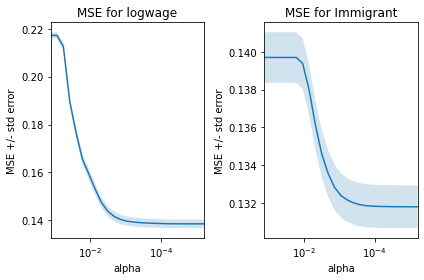

In [28]:
fig, ax = plt.subplots(1,2)

def plotlassocv(l, ax) :
    alphas = l.alphas_
    mse = l.mse_path_.mean(axis=1)
    std_error = l.mse_path_.std(axis=1)
    ax.plot(alphas,mse)
    ax.fill_between(alphas, mse + std_error, mse - std_error, alpha=0.2)

    ax.set_ylabel('MSE +/- std error')
    ax.set_xlabel('alpha')
    ax.set_xlim([alphas[0], alphas[-1]])
    ax.set_xscale("log")
    return(ax)

ax[0] = plotlassocv(lassoy,ax[0])
ax[0].set_title("MSE for logwage")
ax[1] = plotlassocv(lassod,ax[1])
ax[1].set_title("MSE for Immigrant")
fig.tight_layout()


def pickalpha(lassocv) :
    imin = np.argmin(lassocv.mse_path_.mean(axis=1))
    msemin = lassocv.mse_path_.mean(axis=1)[imin]
    se = lassocv.mse_path_.std(axis=1)[imin]
    alpha= min([alpha for (alpha, mse) in zip(lassocv.alphas_, lassocv.mse_path_.mean(axis=1)) if mse<msemin+se])
    return(alpha)

alphay = pickalpha(lassoy)
alphad = pickalpha(lassod)

In [29]:
# show results
pl_lasso = partial_linear(logwage, Immigrant, X,
                          linear_model.Lasso(alpha=lassoy.alpha_),
                          linear_model.Lasso(alpha=lassod.alpha_))
pl_lasso[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):              0.003
Method:                 Least Squares   F-statistic:                              1658.
Date:                Thu, 29 Apr 2021   Prob (F-statistic):                        0.00
Time:                        02:18:32   Log-Likelihood:                     -2.3644e+05
No. Observations:              550105   AIC:                                  4.729e+05
Df Residuals:                  550104   BIC:                                  4.729e+05
Df Model:                           1                                                  
Covariance Type:                  HC0                                                  
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0588      0.001    -40.716      0.000      -0.062      -0.056
==============================================================================
Omnibus:                    15447.582   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29649.576
Skew:                           0.211   Prob(JB):                         0.00
Kurtosis:                       4.056   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

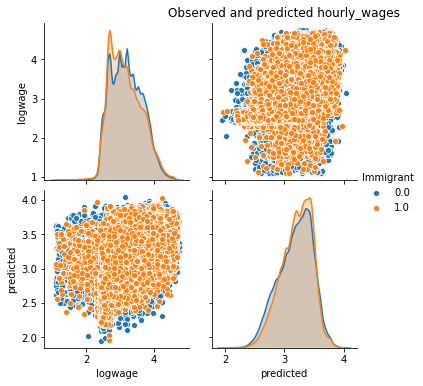

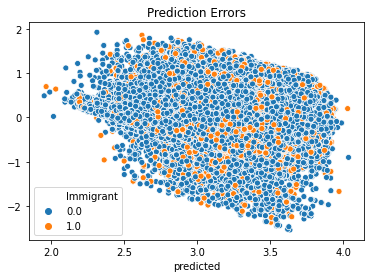

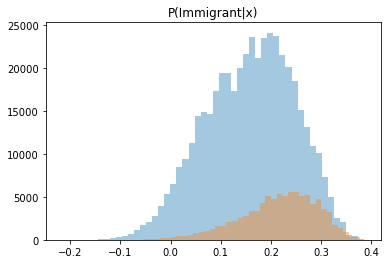

In [30]:
# Visualize predictions
def plotpredictions(pl) :
    df = pd.DataFrame({"logwage":logwage,
                       "predicted":pl[1],
                       "Immigrant":Immigrant,
                       "P(Immigrant|x)":pl[2]})
    sns.pairplot(df, vars=["logwage","predicted"], hue="Immigrant")
    plt.title("Observed and predicted hourly_wages")

    plt.figure()
    sns.scatterplot(df.predicted, df.logwage-df.predicted, hue=df.Immigrant)
    plt.title("Prediction Errors")

    plt.figure()
    sns.distplot(pl[2][Immigrant==0], hist = True, kde = False,
                 kde_kws = {'shade': True, 'linewidth': 3},
                 label = "Non-immigrant")
    sns.distplot(pl[2][Immigrant==1], hist = True, kde = False,
                 kde_kws = {'shade': True, 'linewidth': 3},
                 label = "Immigrant")
    plt.title('P(Immigrant|x)')
plotpredictions(pl_lasso)

#### As a result, the hourly wage gap between immigrants and non-immigrants is -0.0588 conditional on certificate(Education level), Single(Family status), Child(Family status), PROV(Province), NAICS_21(industry of main job), COWMAIN(Class of worker) and working hours. Immigrants earn 5.88% less per hour than non-immigrants. Compared to the gap conditional on working hours, differences in other observable characteristics in the df have expanded the hourly wage between immigrants and non-immigrants(from 3.88% to 5.88%).

##  Neural networks
In order to accuracy of my model, I chose to repeat the procedure with the method of neural networks.

In [13]:
nnp = pipeline.Pipeline(steps=[
    ("scaling", preprocessing.StandardScaler()),
    ("nn", neural_network.MLPRegressor((50,), activation="logistic",
                                       verbose=False, solver="adam",
                                       max_iter=400, early_stopping=True,
                                       validation_fraction=0.15))
])

In [14]:
nndcv = model_selection.GridSearchCV(estimator=nnp, scoring= 'neg_mean_squared_error', cv=4,
                                     param_grid = {'nn__alpha': np.exp(np.linspace(-5,5, 10))},
                                     return_train_score=True, verbose=True, refit=False,
                                     iid=True).fit(X,Immigrant)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed: 21.8min finished
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


In [15]:
nnycv = model_selection.GridSearchCV(estimator=nnp, scoring= 'neg_mean_squared_error', cv=4,
                                     param_grid = {'nn__alpha': np.exp(np.linspace(-5,5, 10))},
                                     return_train_score=True, verbose=True, refit=False,
                                     iid=True).fit(X,logwage)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed: 24.0min finished
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


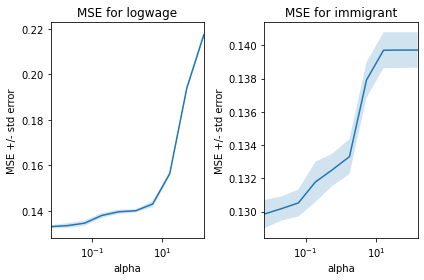

In [16]:
fig, ax = plt.subplots(1,2)

def plotgridcv(g, ax) :
    alphas = g.cv_results_["param_nn__alpha"].data.astype(float)
    mse = -g.cv_results_["mean_test_score"]
    std_error = g.cv_results_["std_test_score"]
    ax.plot(alphas,mse)
    ax.fill_between(alphas, mse+std_error, mse-std_error, alpha=0.2)

    ax.set_ylabel('MSE +/- std error')
    ax.set_xlabel('alpha')
    ax.set_xlim([alphas[0], alphas[-1]])
    ax.set_xscale("log")
    return(ax)

ax[0] = plotgridcv(nnycv,ax[0])
ax[0].set_title("MSE for logwage")
ax[1] = plotgridcv(nndcv,ax[1])
ax[1].set_title("MSE for immigrant")
fig.tight_layout()

# there are theoretical reasons to choose a smaller regularization
# than the one that minimizes cv. BUT THIS WAY OF CHOOSING IS ARBITRARY AND MAYBE WRONG
def pickalphagridcv(g) :
    alphas = g.cv_results_["param_nn__alpha"].data
    mses = g.cv_results_["mean_test_score"]
    imin = np.argmin(mses)
    msemin = mses[imin]
    se = g.cv_results_["std_test_score"][imin]
    alpha= min([alpha for (alpha, mse) in zip(alphas, mses) if mse<msemin+se])
    return(alpha)


In [17]:
alphaynn = pickalphagridcv(nnycv)
alphadnn = pickalphagridcv(nndcv)

In [18]:
# show results
nny = nnp
nny.set_params(nn__alpha = alphaynn)
nnd = nnp
nnd.set_params(nn__alpha = alphadnn)
pl_nn = partial_linear(logwage, Immigrant, X,
                       nny, nnd)
pl_nn[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.002
Model:                            OLS   Adj. R-squared (uncentered):              0.002
Method:                 Least Squares   F-statistic:                              858.8
Date:                Thu, 29 Apr 2021   Prob (F-statistic):                   1.21e-188
Time:                        02:03:06   Log-Likelihood:                     -2.6813e+05
No. Observations:              550105   AIC:                                  5.363e+05
Df Residuals:                  550104   BIC:                                  5.363e+05
Df Model:                           1                                                  
Covariance Type:                  HC0                                                  
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0431      0.001    -29.306      0.000      -0.046      -0.040
==============================================================================
Omnibus:                    10532.319   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11771.388
Skew:                           0.308   Prob(JB):                         0.00
Kurtosis:                       3.366   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

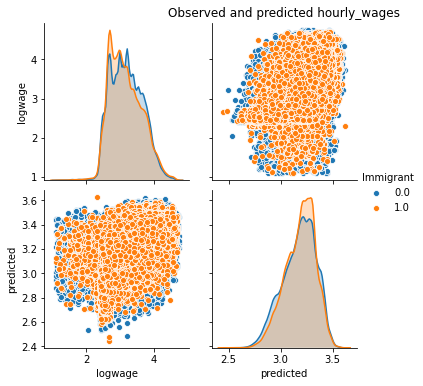

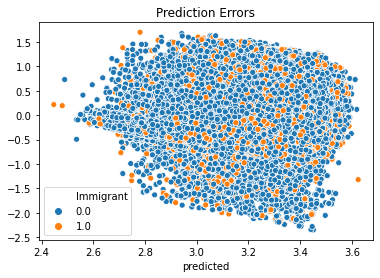

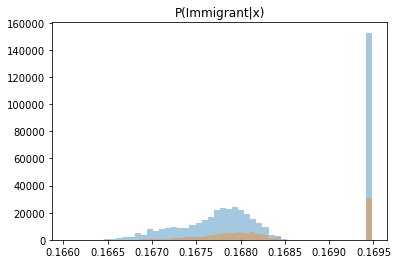

In [19]:
# Visualization
plotpredictions(pl_nn)

In [20]:
summary_col([pl_lasso[0], pl_nn[0]], model_names=["Lasso", "Neural Network"] ,stars=False)

,Lasso,Neural Network
x1,-0.0588,-0.0431
,(0.0014),(0.0015)
R-squared,0.0033,0.0017
,0.0033,0.0017


## In summary, from the neural network, the hourly wage gap between immigrants and non-immigrants by neural network is -0.0431 which is slightly lower than the result from Partially Linear Regression. Either way, the result from the analysis shows that in 2019, immigrants receive significantly lower hourly wages than non-immigrants in Canada.